# Music Stream Project

## Contents <a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Data Review](#data_review)
    * [Conclusions](#data_review_conclusions)
* [Stage 2. Data Preprocessing](#data_preprocessing)
    * [2.1 Header Style](#header_style)
    * [2.2 Missing Values](#missing_values)
    * [2.3 Duplicates](#duplicates)
    * [2.4 Data Preprocessing Conclusions](#data_preprocessing_conclusions)
* [Stage 3. Hypothesis Test](#hypothesis)
    * [3.1 Hypothesis 1: Comparing user behavior in the two cities](#activity)
* [Conclusions](#end)

## Introduction <a id='intro'></a>
As a data analyst, my role involves analyzing data to uncover valuable insights and make informed decisions. This particular project includes stages like data exploration, preprocessing, and hypothesis testing.

When conducting research, I formulate hypotheses that I can subsequently test. Depending on the results, I either accept or reject these hypotheses. It's crucial for making accurate decisions that my organization understands if our assumptions are correct.

This project compares the music preferences between Springfield and Shelbyville. By examining real data from online music streaming services, I aim to test a specific hypothesis and investigate how users from these two cities behave differently in terms of music consumption. This research will provide valuable insights that can guide strategic decisions and potentially uncover trends or patterns in user behavior.

### Goal:
I will test the hypothesis that shows user activity varies based on the day of the week and differs depending on the city.

For this study, I'll analyze data to see if there are noticeable differences in how users from Springfield and Shelbyville engage with online music streaming services throughout the week. This will involve examining patterns and behaviors specific to each city and correlating them with daily trends. The goal is to determine if there are significant variations in user activity based on both the day of the week and the city they reside in.

### Stages:

- 1.- Data Description:
In this stage, I will analyze the data structure, review available columns, identify potential issues such as missing or inconsistent data, and calculate key descriptive statistics to better understand the nature of the data.

- 2.- Data Preprocessing:
I will address the issues identified in the data description phase. This may include handling missing data through imputation or deletion, correcting format errors, standardizing data if necessary, and any other transformations needed to prepare the data for further analysis. The goal is to ensure the data is clean, consistent, and ready for hypothesis testing.

- 3.- Hypothesis Testing:
Once the data is prepared, I will proceed with testing the hypothesis that user activity varies by day of the week and differs between the cities of Springfield and Shelbyville. I will use appropriate statistical methods to compare user behaviors in both cities across different days of the week. The results of this test will provide insights into whether there are significant differences in user behavior based on both the day of the week and geographical location.

Each stage is crucial to ensuring the validity and proper interpretation of the results obtained in this data analysis project.

[Back to Contents](#back)

## Stage 1. Data Review <a id='data_review'></a>

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ricardosillercardenas/da_projects_dataframes/main/music_project_en.csv')

Let´s see the first 10 rows and info:

In [2]:
print(df.head(10))
print('_'*75)
print(df.info())

     userID                        Track            artist   genre  \
0  FFB692EC            Kamigata To Boots  The Mass Missile    rock   
1  55204538  Delayed Because of Accident  Andreas Rönnberg    rock   
2    20EC38            Funiculì funiculà       Mario Lanza     pop   
3  A3DD03C9        Dragons in the Sunset        Fire + Ice    folk   
4  E2DC1FAE                  Soul People        Space Echo   dance   
5  842029A1                       Chains          Obladaet  rusrap   
6  4CB90AA5                         True      Roman Messer   dance   
7  F03E1C1F             Feeling This Way   Polina Griffith   dance   
8  8FA1D3BE                     L’estate       Julia Dalia  ruspop   
9  E772D5C0                    Pessimist               NaN   dance   

        City        time        Day  
0  Shelbyville  20:28:33  Wednesday  
1  Springfield  14:07:09     Friday  
2  Shelbyville  20:58:07  Wednesday  
3  Shelbyville  08:37:09     Monday  
4  Springfield  08:34:34     Monday  
5

Let's check missing values

In [3]:
print(df.isna().sum())
print()
print(df.duplicated().sum())

  userID       0
Track       1343
artist      7567
genre       1198
  City         0
time           0
Day            0
dtype: int64

3826


The result of applying the isna() method shows that there are missing values in the columns 'track', 'artis', and 'genre'.

Specifically, we found that there are 1343 missing values in the 'track' column, 7567 missing values in the 'artis' column, and 1198 missing values in the 'genre' column.

These missing values may indicate incomplete data in the original dataset. It is important to address these missing values properly before conducting further analysis, as they can affect the accuracy and validity of our results.

When applying the method df.duplicated().sum(), we found that there are 3826 explicitly duplicated values in the DataFrame. It is crucial to investigate and resolve these duplicates to ensure the integrity and reliability of our analyses and results.

Additionally, I noticed that when running the dtypes method on the dataframe, I observed that all columns are identified as type 'object'. However, this classification does not provide detailed information about the actual data types contained in each column, such as integer, string, boolean, float, among others.

In [4]:
print("dtype by column:")
print(df.dtypes)

dtype by column:
  userID    object
Track       object
artist      object
genre       object
  City      object
time        object
Day         object
dtype: object


### Conclusions <a id='data_review_conclusions'></a>

I expected the dtypes method to provide more specific information for each column, which would allow me to better understand the nature of the data we are handling. It's important to note this discrepancy and, if necessary, explore more thoroughly the actual data types in each column to conduct a more precise and effective analysis. This will ensure that we accurately interpret and utilize the data in our further analyses and modeling processes.

[Back to Contents](#back)

## Stage 2. Data Preprocessing <a id='data_preprocessing'></a>

The goal here is to prepare the data for analysis. The first step is to address any issues with the headers. Then, I can move on to missing values and duplicates. Let's begin.


### Header Style <a id='header_style'></a>


In [5]:
print(df.columns)

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')


In [6]:
new_headers = {}

for column in df.columns:
    lowered_headers = column.lower()
    new_headers[column] = lowered_headers

# Let's rename columns
df = df.rename(columns=new_headers)

Now, using the same method, I will remove any leading or trailing spaces from the column names and print the column names again:

In [7]:
new_headers = {}

for column in df.columns:
    stripped_spaces_headers = column.strip()
    new_headers[column] = stripped_spaces_headers

df = df.rename(columns=new_headers)

I need to apply the snake_case rule to the column userid. It should be user_id. I'll change the name of this column and show all column names when I'm done.

In [8]:
df = df.rename(columns={'userid': 'user_id'})

[Back to Contents](#back)

### Missing Values <a id='missing_values'></a>
First, find the number of missing values in the table. You should use two methods in sequence to obtain the number of missing values.

In [9]:
print(df.isna().sum())
print()
print("Total number of missing values:", df.isna().sum().sum())

user_id       0
track      1343
artist     7567
genre      1198
city          0
time          0
day           0
dtype: int64

Total number of missing values: 10108


Not all missing values impact the research. For example, missing values in track and artist are not crucial and can simply be replaced with a default value like 'unknown'.

However, missing values in 'genre' could affect the comparison between the music preferences of Springfield and Shelbyville. In real-life scenarios, understanding the reasons behind missing data and attempting to recover them would be useful. However, we do not have that opportunity in this project. Therefore, you will need to:

Fill these missing values with a default value.
Assess how much these missing values could impact your computations.
Replace the missing values in the columns 'track', 'artist', and 'genre' with the string 'unknown'. As we have seen in previous lessons, the best way to do this is to create a list storing the names of the columns where replacement is needed. Then, iterate through these columns using the list to perform the replacement.

In [10]:
columns_replace = ['track', 'artist', 'genre']

for column in columns_replace:
    df[column].fillna('unknown', inplace=True)

Now, I'll check the result to make sure that after the replacement, there are no missing values left in the dataset. I'll count the missing values again to verify this.

In [11]:
# Count absent values

print(df.isna().sum())
print()
print("Total number of missing values:", df.isna().sum().sum())


user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64

Total number of missing values: 0


[Back to Contents](#back)

### Duplicates <a id='duplicates'></a>
To find the number of explicit duplicates in the table, once again, I will apply two methods in sequence to obtain the count of explicit duplicates.

In [12]:
# Let's count explicit duplicates

print("Total number of duplicated values:", df.duplicated().sum())

Total number of duplicated values: 3826


Now, I will remove all duplicates. To do this, I'll call the method that accomplishes this task directly.

In [13]:
df = df.drop_duplicates()
print("Total number of duplicated values:", df.duplicated().sum())

Total number of duplicated values: 0


Now we want to get rid of implicit duplicates in the genre column. For example, genre names might be written in various forms, which could affect the results.

To do this, first let's display a list of unique genre names, sorted alphabetically. Here's how:

In [14]:
unique_genres = df['genre']
unique_genres = unique_genres.unique()
unique_genres.sort()

print("Number of unique genres:", len(unique_genres))
print()
print("Unique genres list:")
for genero in unique_genres:
    print(genero)

Number of unique genres: 269

Unique genres list:
acid
acoustic
action
adult
africa
afrikaans
alternative
ambient
americana
animated
anime
arabesk
arabic
arena
argentinetango
art
audiobook
avantgarde
axé
baile
balkan
beats
bigroom
black
bluegrass
blues
bollywood
bossa
brazilian
breakbeat
breaks
broadway
cantautori
cantopop
canzone
caribbean
caucasian
celtic
chamber
children
chill
chinese
choral
christian
christmas
classical
classicmetal
club
colombian
comedy
conjazz
contemporary
country
cuban
dance
dancehall
dancepop
dark
death
deep
deutschrock
deutschspr
dirty
disco
dnb
documentary
downbeat
downtempo
drum
dub
dubstep
eastern
easy
electronic
electropop
emo
entehno
epicmetal
estrada
ethnic
eurofolk
european
experimental
extrememetal
fado
film
fitness
flamenco
folk
folklore
folkmetal
folkrock
folktronica
forró
frankreich
französisch
french
funk
future
gangsta
garage
german
ghazal
gitarre
glitch
gospel
gothic
grime
grunge
gypsy
handsup
hard'n'heavy
hardcore
hardstyle
hardtechno
hip
hip-ho

Let's look through the list to find implicit duplicates of the genre hiphop. These could be incorrectly written names or alternative names for the same genre.

You will find the following implicit duplicates:
* hip
* hop
* hip-hop

To get rid of them, I will create a function called replace_wrong_genres() with two parameters:

* wrong_genres: This will be a list containing all the values that need to be replaced.
* correct_genre: This parameter will be the string used for replacement.

As a result, the function should correct the names in the 'genre' column of the DataFrame df, meaning it will replace each value from the wrong_genres list with the correct_genre value.

Inside the function, I'll use a for loop to iterate over the list of incorrect genres, extract the 'genre' column, and apply the replace method to make the corrections.

In [15]:
def replace_wrong_genres(wrong_genres, correct_genre):
    for genre in wrong_genres:
        df['genre'] = df['genre'].replace(genre, correct_genre)

wrong_genres = ['hip', 'hop', 'hip-hop']
correct_genre = 'hiphop'

Now, I will call replace_wrong_genres() and pass these arguments to remove the implicit duplicates (hip, hop, and hip-hop) and replace them with hiphop:

In [16]:
replace_wrong_genres(wrong_genres, correct_genre)

In [17]:
# Let's check
print(df[df['genre'] == 'hiphop'])

        user_id                                track  \
20     201CF2A8                     Ya'll In Trouble   
46     825997A5                     Glorious Feeling   
79     1DA07AA4                              Cardi B   
81     CCD46819                               Narcos   
82       80396F                           Ay Caramba   
...         ...                                  ...   
65034  C1C4C94D                              Payback   
65041  78713DBB          Feels Like Saving The World   
65043  CDCAFD62                               Payday   
65052  72CB2D36  Yeezy Taught Her (feat. King Louie)   
65075  D08D4A55    Maybe One Day (feat. Black Spade)   

                                                  artist   genre         city  \
20     Lil Tee Chill Tank Young Buck Brother Mohammed...  hiphop  Springfield   
46                                            Joelistics  hiphop  Springfield   
79                                             Money Man  hiphop  Shelbyville   
81 

Finally, I'll show the list of unique values in the 'genre' column again:

In [18]:
unique_genres = df['genre']


unique_genres = unique_genres.unique()


unique_genres.sort()

print("Number of unique genres:", len(unique_genres))
print()
print("List of unique genres:")
for genero in unique_genres:
    print(genero)

Number of unique genres: 266

List of unique genres:
acid
acoustic
action
adult
africa
afrikaans
alternative
ambient
americana
animated
anime
arabesk
arabic
arena
argentinetango
art
audiobook
avantgarde
axé
baile
balkan
beats
bigroom
black
bluegrass
blues
bollywood
bossa
brazilian
breakbeat
breaks
broadway
cantautori
cantopop
canzone
caribbean
caucasian
celtic
chamber
children
chill
chinese
choral
christian
christmas
classical
classicmetal
club
colombian
comedy
conjazz
contemporary
country
cuban
dance
dancehall
dancepop
dark
death
deep
deutschrock
deutschspr
dirty
disco
dnb
documentary
downbeat
downtempo
drum
dub
dubstep
eastern
easy
electronic
electropop
emo
entehno
epicmetal
estrada
ethnic
eurofolk
european
experimental
extrememetal
fado
film
fitness
flamenco
folk
folklore
folkmetal
folkrock
folktronica
forró
frankreich
französisch
french
funk
future
gangsta
garage
german
ghazal
gitarre
glitch
gospel
gothic
grime
grunge
gypsy
handsup
hard'n'heavy
hardcore
hardstyle
hardtechno
hiphop


[Back to Contents](#back)

### Data Preprocessing Conclusions <a id='data_preprocessing_conclusions'></a>

Upon analyzing the duplicates in the 'genre' column, I noticed there were implicit duplicates due to different ways of writing the same genre, specifically 'hip', 'hop', and 'hip-hop', which actually referred to the genre 'hiphop'.

The result of the replace_wrong_genres() function was successful in cleaning up the implicit duplicates in the 'genre' column, ensuring all records refer to the same genre 'hiphop'.

Initially, we observed 269 unique genres in the 'genre' column. After applying the requested function, we reduced this number to 266. In other words, we removed the three incorrect genre names for hiphop.

[Back to Contents](#back)

## Stage 3. Hypothesis Test <a id='hypothesis'></a>

### Hypothesis: Comparing user behavior in the two cities.<a id='activity'></a>

The hypothesis states that there are differences in how users in Springfield and Shelbyville consume music. To test this, I'll use data from three days of the week: Monday, Wednesday, and Friday.

I'll group users by city.
I'll compare the number of songs each group played on Monday, Wednesday, and Friday.
I'll perform each calculation separately.

The first step is to evaluate user activity in each city. Remember the split-apply-combine stages we discussed earlier in the lesson. My goal now is to group the data by city, apply the appropriate counting method during the apply stage, and then find the number of songs played in each group by specifying the column for the count.

Here's an example of how the final result should look:
df.groupby(by='....')['column'].method()

To evaluate the activity of users in each city, I'll group the data by city and find the number of songs played in each group.


In [19]:
print(df.groupby(by='city'))
print()
print()
print(df.groupby(by='city').count())
print()
print()
tracks_by_city = df.groupby(by='city')['track'].count()
print(tracks_by_city)




             user_id  track  artist  genre   time    day
city                                                    
Shelbyville    18512  18512   18512  18512  18512  18512
Springfield    42741  42741   42741  42741  42741  42741


city
Shelbyville    18512
Springfield    42741
Name: track, dtype: int64


Now let's group the data by day of the week and find the number of songs played on Monday, Wednesday, and Friday. Use the same method as before, but now we need a different grouping.

In [20]:
songs_by_day = df.groupby('day')['track'].count()

three_days = songs_by_day.loc[['Monday', 'Wednesday', 'Friday']]

print(three_days)

day
Monday       21354
Wednesday    18059
Friday       21840
Name: track, dtype: int64


I know how to count entries by grouping them by city or day. Now I need to write a function that can count entries based on both criteria simultaneously.

I'll create the number_tracks() function to calculate the number of songs played on a specific day and city. The function will accept two parameters:

* day: A day of the week to filter by. For example, 'Monday'.
* city: A city to filter by. For example, 'Springfield'.
Within the function, I'll apply consecutive filtering with logical indexing.

First, I'll filter the data by day and then filter the resulting table by city.

After filtering the data by both criteria, I'll count the number of values in the 'user_id' column in the resulting table. This count represents the number of entries I'm looking for. I'll save the result in a new variable and return it from the function.

In [21]:
# Declare the function number_tracks() with two parameters: day= and city=.
def number_tracks(day, city):
    
# Store the rows of the DataFrame where the value in the 'day' column equals the day parameter
    filtered_day = df[df['day'] == day]

# Filter the rows where the value in the 'city' column equals the city parameter
    filtered_city = filtered_day[filtered_day['city'] == city]
    
# Extract the 'user_id' column from the filtered table and apply the count() method
    tracks_count = filtered_city['user_id'].count()

# Return the number of values in the 'user_id' column
    return tracks_count


In [22]:
# The number of songs played in Springfield on Monday
number_tracks('Monday', 'Springfield')


15740

In [23]:
# The number of songs played in Shelbyville on Monday
number_tracks('Monday', 'Shelbyville')


5614

In [24]:
# The number of songs played in Springfield on Wednesday
number_tracks('Wednesday', 'Springfield')

11056

In [25]:
# The number of songs played in Shelbyville on Wednesday
number_tracks('Wednesday', 'Shelbyville')


7003

In [26]:
# The number of songs played in Springfield on Friday
number_tracks('Friday', 'Springfield')

15945

In [27]:
# The number of songs played in Shelbyville on Friday
number_tracks('Friday', 'Shelbyville')

5895

**Conclusions**

Based on the analysis conducted on this dataframe, let's review the results obtained.

We have analyzed the activity of users in two different cities, Springfield and Shelbyville, over three days of the week: Monday, Wednesday, and Friday. For each combination of city and day of the week, we counted the number of songs played.

When observing the differences in the number of songs played between the two cities for a specific day, and considering that these differences remain consistent across the three days analyzed, we can conclude that the hypothesis is partially valid. This suggests that the activity of users does differ based on both the city and the day of the week.

However, the rigor of data analysis should not be conclusive to fully accept the hypothesis. We may need to conduct some form of exploratory data analysis. Here's an example:  

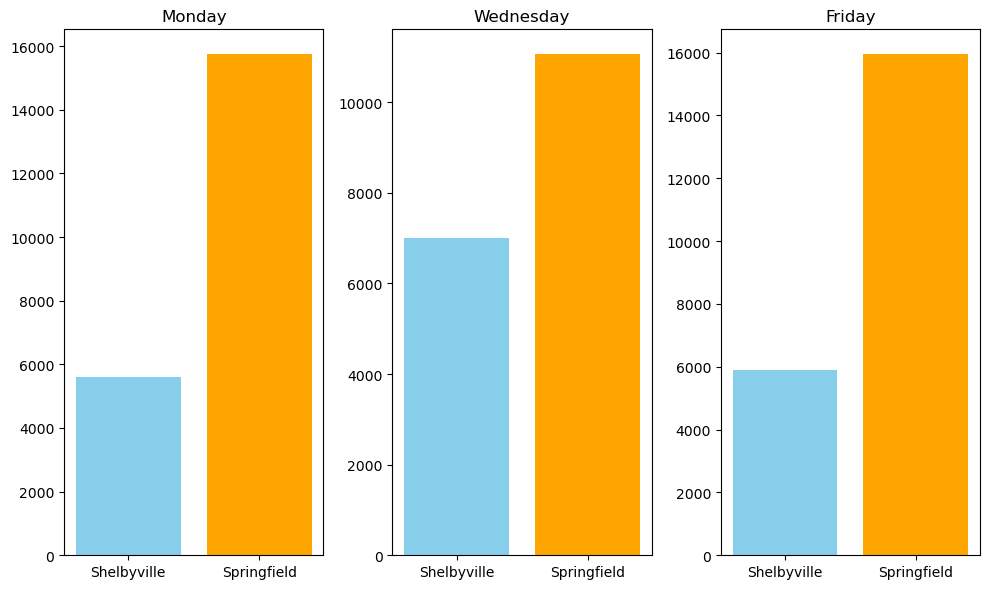

In [28]:
import matplotlib.pyplot as plt

# Filter data by day of the week and city
shelbyville_data = df[(df['city'] == 'Shelbyville') & (df['day'].isin(['Monday', 'Wednesday', 'Friday']))]
springfield_data = df[(df['city'] == 'Springfield') & (df['day'].isin(['Monday', 'Wednesday', 'Friday']))]

# Get track counts for each city and day
shelbyville_counts = shelbyville_data.groupby('day')['track'].count()
springfield_counts = springfield_data.groupby('day')['track'].count()

# Create bar charts to compare track counts
plt.figure(figsize=(10, 6))

# Monday
plt.subplot(1, 3, 1)
plt.bar(['Shelbyville', 'Springfield'], [shelbyville_counts['Monday'], springfield_counts['Monday']], color=['skyblue', 'orange'])
plt.title('Monday')

# Wednesday
plt.subplot(1, 3, 2)
plt.bar(['Shelbyville', 'Springfield'], [shelbyville_counts['Wednesday'], springfield_counts['Wednesday']], color=['skyblue', 'orange'])
plt.title('Wednesday')

# Friday
plt.subplot(1, 3, 3)
plt.bar(['Shelbyville', 'Springfield'], [shelbyville_counts['Friday'], springfield_counts['Friday']], color=['skyblue', 'orange'])
plt.title('Friday')

plt.tight_layout()
plt.show()



This is my personal attempt at conducting a comparative analysis showing the number of songs played on Monday, Wednesday, and Friday for the cities of Shelbyville and Springfield. In these bar charts, I present one chart for each day of the week, where the height of each bar represents the number of songs played.

By observing the charts, we can make direct comparisons between Shelbyville and Springfield for each day of the week. For example, we can see if there are significant differences in the number of songs played between the two cities on a particular day.

While this analysis is rudimentary, it helps us better understand how music listening behavior varies between the two cities on different days of the week, which can provide valuable insights for future marketing strategies or business decisions.

If my analysis is unbiased due to appropriately written code, I could conclude that Springfield residents are more music enthusiasts than those in Shelbyville.

[Back to Contents](#back)

# Conclusions <a id='end'></a>

We have worked on a data analysis project focused on comparing music preferences between the cities of Springfield and Shelbyville based on the following hypothesis:

* The activity of users differs depending on the day of the week and the city.

The project was divided into several stages:

* Data Description: We imported the data from a CSV file and conducted an initial exploration to understand its structure and content. We identified issues such as inconsistent column names, missing values, and duplicates.

* Data Preprocessing: We addressed the issues identified in the previous stage by correcting column names, handling missing values, and removing duplicates.

* Exploratory Data Analysis: We performed a more detailed analysis of the data to better understand the distributions and relationships between variables. We used a function to gather insights into listening habits of citizens from both cities on Mondays, Wednesdays, and Fridays. Personally, I proposed creating visualizations to explore these findings visually.

Finally, we evaluated our initial hypothesis. Each step brought us closer to understanding the musical preferences of the two cities and allowed us to draw evidence-based conclusions.

However, given the relatively informal analysis according to project specifications, I personally believe more evidence and rigorous analysis would be needed to fully support or reject the hypothesis.

Therefore, since our results support the statement to some extent but not enough to fully accept it, our hypothesis will be accepted partially.

[Back to Contents](#back)